# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, attributes of each product and store are available. The aim is to build a predictive model and determine the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### In following weeks, we will explore the problem in following stages:

1. **Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome**
2. **Data Exploration – looking at categorical & continuous feature summaries and making inferences about the data**
3. **Data Cleaning – imputing missing values in the data and checking for outliers**
4. **Feature Engineering – modifying existing variables and/or creating new ones for analysis**
5. **Model Building – making predictive models on the data**
---------

## 1. Hypothesis Generation

This is a significant step in the process of analyzing data. It involves understanding the problem at hand and making a hypothesis about what could potentially have a good impact on the outcome. 

This is accomplished **before** looking at the data. We will have a list of the different analyses we can potentially perform if the data is available. 

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

Think further and create some of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

----------

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np

#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Task:** One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

# missing data


In [22]:
# print("\nData is null  \n"+str(data.isnull()))
print("\nData is null SUM \n" +str( data.isnull().sum())) #looks at the values inside.
print("\nData is null count \n" +str(data.count())) # looks at columns avaiable, doesnt care if i


Data is null SUM 
Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data is null count 
Item_Identifier              8523
Item_Weight                  8519
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


In [23]:
missing_values = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_values = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data= pd.concat([missing_values,percent_of_missing_values], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,4,0.000469
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


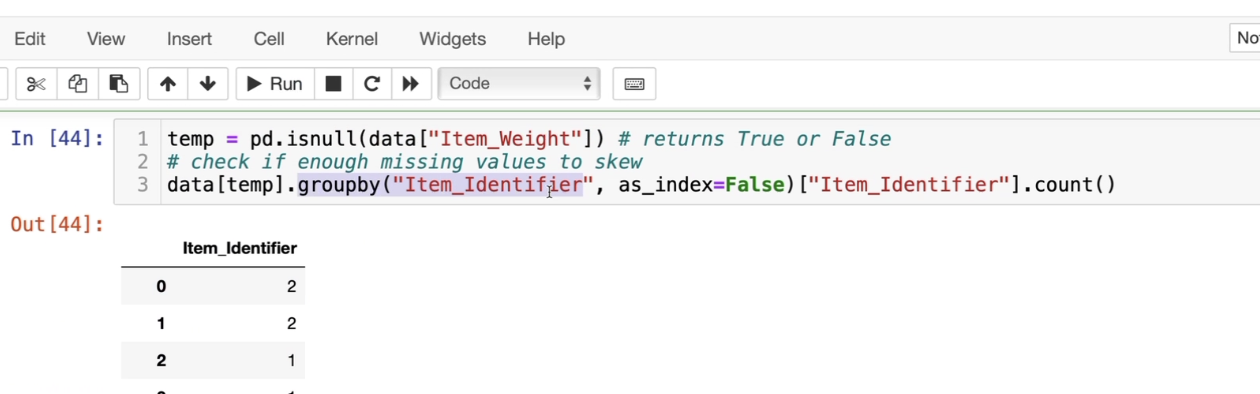

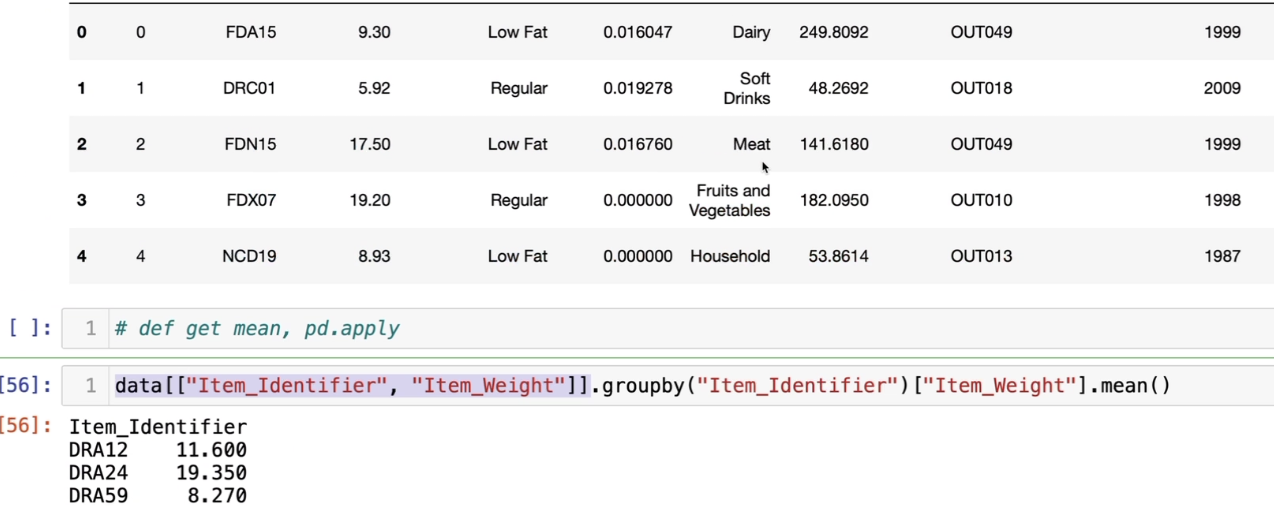

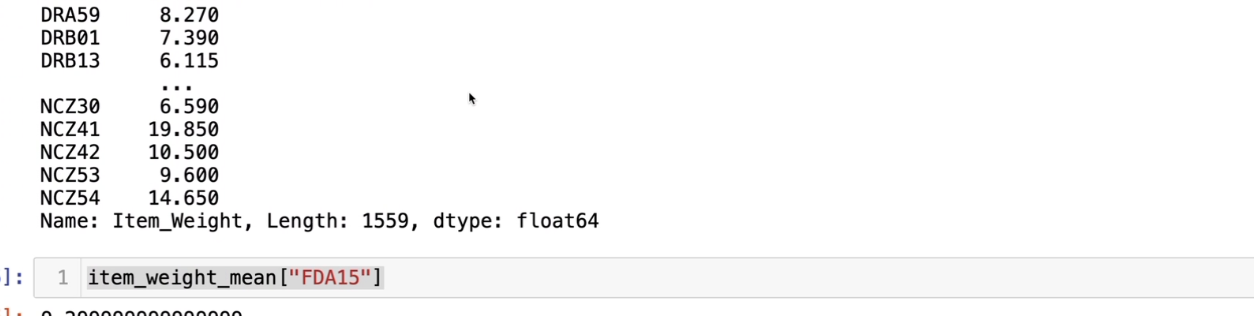

# FILL THE NA VALUES WITH THE MEAN OF THE GROUB BY ITEM IDENTIFIER AND ITEM WEIGHT WITH THE MEAN OF THE WEIGHT :) TRANSFORM 

In [25]:
# pd.set_option('display.max_rows', data.shape[0]+1)
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))#this is GOLD 


# Print ALLLLLLLL the items in the BD. Be careful, can crash the browser

In [ ]:
pd.set_option('display.max_rows', data.shape[0]+1)

In [6]:
# print(len(set(data['Item_Identifier'])))
# copydata=data

# the_mean = data[["Item_Identifier","Item_Weight"]].groupby("Item_Identifier")["Item_Weight"].mean() #nested bracket need 2 if we have 2 or more columns
# das=data.Item_Weight.isnull().groupby(data['Item_Identifier']).sum()




# data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))#this is GOLD 
# # df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))
# print(data[['Item_Weight','Item_Identifier']])

# print(the_mean)


# # print(das)

# for each in das:
#     test=data['Item_Identifier']==data[each]
#     print(test)
# #Python
# #Col 1 = where you want the values replaced
# #Col 2 = where you want to take the values from
# data["Item_Weight"].fillna(df["Col 2"], inplace=True)


# itemweight2 = set()

1559
      Item_Weight Item_Identifier
0           9.300           FDA15
1           5.920           DRC01
2          17.500           FDN15
3          19.200           FDX07
4           8.930           NCD19
5          10.395           FDP36
6          13.650           FDO10
7          19.000           FDP10
8          16.200           FDH17
9          19.200           FDU28
10         11.800           FDY07
11         18.500           FDA03
12         15.100           FDX32
13         17.600           FDS46
14         16.350           FDF32
15          9.000           FDP49
16         11.800           NCB42
17          9.000           FDP49
18          8.260           DRI11
19         13.350           FDU02
20         18.850           FDN22
21          8.315           FDW12
22         14.600           NCB30
23         15.500           FDC37
24         13.850           FDR28
25         13.000           NCD06
26          7.645           FDV10
27         11.650           DRJ59
28       

In [7]:
# def fill_means(x): # pd.isnull(data["Item_Weight"])
# for i in data["Item_Weight"]:
#     print(i)
#     if data["Item_Weight"].isnull(i):
#         pass

**Task:**: Look at some basic descriptive statistics for numerical variables.

In [8]:
print(data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8519.000000      8523.000000  8523.000000                8523.000000   
mean     12.875420         0.066132   140.992782                1997.831867   
std       4.646098         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026989    93.826500                1987.000000   
50%      12.650000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


Make some observations: <br>
Do the min & max values make sense?

In [9]:
# import plotly.express as px

# for column in data:
#     fig = px.histogram(data, x=column,nbins=7)
#     fig.show()


   

In [10]:
# # x and y given as array_like objects
# import plotly.express as px


# for column in data:
#         if data[column].dtype !='object':
#             fig = px.scatter(data,x=data["Item_Outlet_Sales"], y=data[column])
#             fig.show()

**Task:** Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [20]:
uniqueValues = data.nunique()
print(uniqueValues)

Item_Identifier              1559
Item_Weight                   446
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


**Task:** How many products are there, how many stores, item types?


In [19]:
print("\nThere are this many unique products : "+str(len(set(data['Item_Identifier']))))
print("\nThere are this many unique Outlets : "+str(len(set(data['Outlet_Identifier']))))
print("\nThere are this many unique PRoduct Types : "+str(len(set(data['Item_Type']))))


There are this many unique products : 1559

There are this many unique Outlets : 10

There are this many unique PRoduct Types : 16


**Task:** Explore the numbers of each categorical variable.

# Use a dictionary to clean the data

In [13]:
# pd.set_option('display.max_rows', data.shape[0]+1)
print(set(data['Item_Fat_Content']))
nomenclature = {'reg':'Regular','low fat':'Low Fat','LF':'Low Fat',"Regular":"Regular","Low Fat":"Low Fat"}
data["Item_Fat_Content"].replace(nomenclature, inplace=True)

print(set(data['Item_Fat_Content']))

# data.replace({"Item_Fat_Content": nomenclature})

# df.replace([0, 1, 2, 3], 4)
# data['Item_Fat_Content'].map(nomenclature) 
# print(set(data['Item_Fat_Content']))


{'reg', 'LF', 'Low Fat', 'low fat', 'Regular'}
{'Regular', 'Low Fat'}


Observe the output:

Tip: look at the unique values of `Item_Fat_Content`

-----------

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

**Task:** Which variables have missing values? How can you fill those values? Think of some suitalbe strategy; zero filling, mean, & median values. Maybe mean values per `Item_Type`.

**Stretch:** What happens when we fill our missing values with mean vs. median?

In [14]:

data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))



**Task:** Check if there are no more missing values.

In [21]:
print("\nData is null SUM \n" +str( data.isnull().sum())) #looks at the values inside.
print("\nData is null count \n" +str(data.count())) # looks at columns avaiable, doesnt care if i


Data is null SUM 
Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Data is null count 
Item_Identifier              8523
Item_Weight                  8519
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


In [26]:
print(set(data['Outlet_Size']))

{nan, 'High', 'Medium', 'Small'}


In [36]:
# dddd=data["Outlet_Size"].groupby("Outlet_Identifier")
data.groupby(['Outlet_Identifier','Outlet_Size'], as_index=False)['Outlet_Size'].count()

In [46]:
g = data.groupby('Outlet_Identifier')['Outlet_Size'].apply(lambda x: list(np.unique(x)))
print(g)

w = data.groupby('Outlet_Identifier')['Outlet_Size'].agg(['unique'])
print(w)

Outlet_Identifier
OUT010    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
OUT013                                               [High]
OUT017    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
OUT018                                             [Medium]
OUT019                                              [Small]
OUT027                                             [Medium]
OUT035                                              [Small]
OUT045    [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
OUT046                                              [Small]
OUT049                                             [Medium]
Name: Outlet_Size, dtype: object
                     unique
Outlet_Identifier          
OUT010                [nan]
OUT013               [High]
OUT017                [nan]
OUT018             [Medium]
OUT019              [Small]
OUT027             [Medium]
OUT035              [Small]
OUT045                [nan]
OUT046              [Small]
OUT049             [Medium]
